Suponiendo que todos los nodos tienen inicialmente un comportamiento B. Cada nodo puede
cambiar al comportamiento A si al menos la mitad de sus vecinos tiene dicho comportamiento.
Tomaremos algunos nodos como early adopters de A. Si los demás nodos siguen la regla del
umbral (threshold) para adherir a este nuevo comportamiento, ¿qué nodos implementarían el comportamiento A?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import matplotlib.cm as cm

In [2]:
G = nx.read_edgelist("as.txt", delimiter="	")

In [ ]:
vecinos = nx.to_dict_of_lists(G)

In [3]:
pos_spring_layout = nx.spring_layout(G)

In [12]:
from matplotlib.pyplot import figure

def print_graph(G, pos, comportamiento): 
    figure(figsize=(12, 12), dpi=90)
    # nodes
    for node in G.nodes:
        if comportamiento[node] == 'A':
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=8, node_color='red')
        else:
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=8, node_color='blue')
    # edges
    nx.draw_networkx_edges(G, pos, width=0.5,alpha=0.2)
    plt.axis('off')
    plt.figure(figsize=(50000,50000))
    plt.show()

In [25]:
def cantidadXcomportamiento(comportamiento):
    cantA = 0
    cantB = 0
    for node in comportamiento:
        if comportamiento[node] == 'A':
            cantA += 1
        else:
            cantB += 1
    print("Cantidad de A: " + str(cantA))
    print("Cantidad de B: " + str(cantB))

In [40]:
def cambiarComportamiento(iteraciones, comportamiento):
    for _ in range(iteraciones):
        new_comportamiento = comportamiento.copy()
        for node in G.nodes:
            cmpA = 0.0
            for neighbor in vecinos[node]:
                if neighbor == node:
                    continue
                if comportamiento[neighbor] == 'A':
                    cmpA += 1.0
            if cmpA >= (len(vecinos[node])/2):
                new_comportamiento[node] = 'A'
        comportamiento = new_comportamiento
    return comportamiento

In [74]:
import random

def generarComportamientoRandom(prob):
    comportamiento = {}
    for node in G.nodes:
        if random.random() < prob:
            comportamiento[node] = 'A'
        else:
            comportamiento[node] = 'B'
    return comportamiento

El 1% de los nodos seran early adopters.

In [46]:
comportamiento1 = generarComportamientoRandom(0.01)
cantidadXcomportamiento(comportamiento1)

Cantidad de A: 66
Cantidad de B: 6408


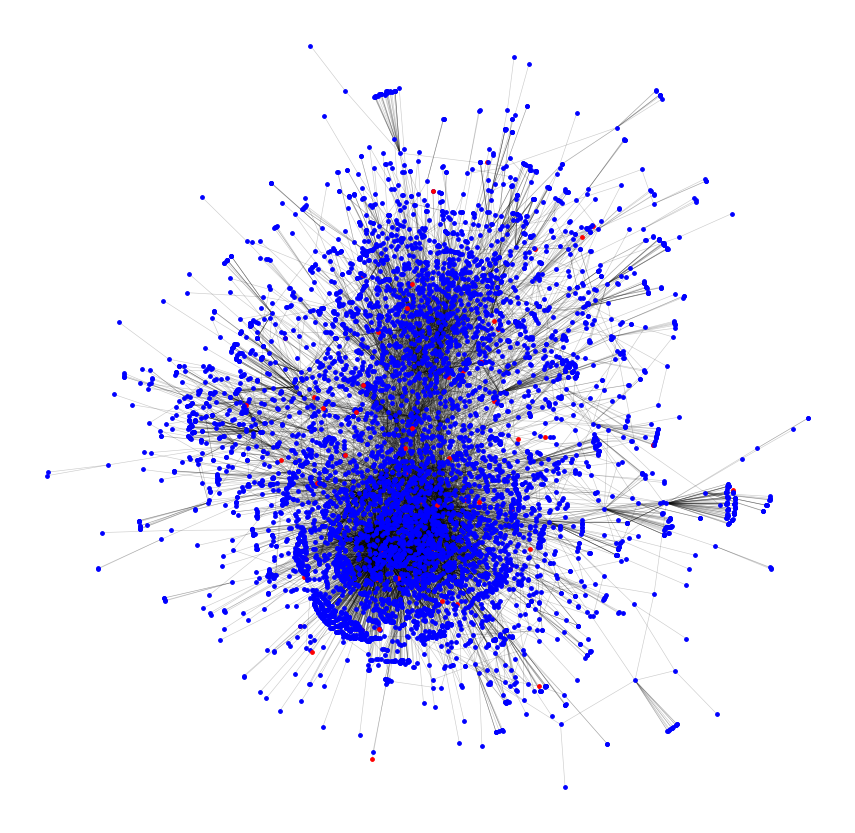

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [13]:
print_graph(G, pos_spring_layout, comportamiento1)

In [47]:
comportamiento1 = cambiarComportamiento(1000, comportamiento1)
cantidadXcomportamiento(comportamiento1)

Cantidad de A: 153
Cantidad de B: 6321


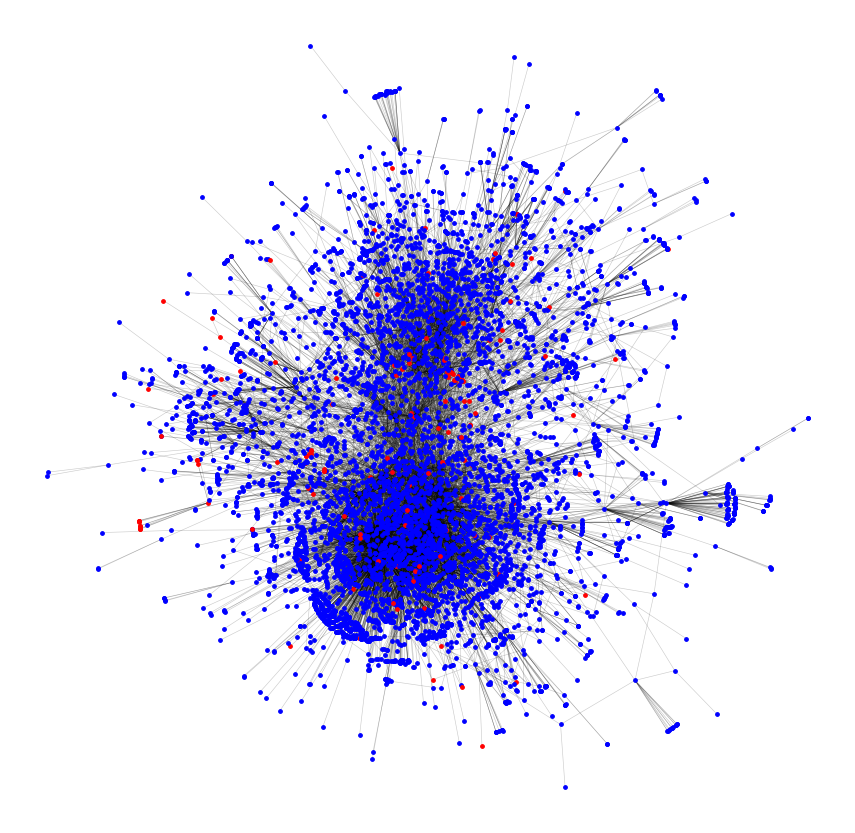

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [48]:
print_graph(G, pos_spring_layout, comportamiento1)

Probamos ahora poniendo mas nodos como early adopters: el 10%

In [75]:
comportamiento2 = generarComportamientoRandom(0.1)
cantidadXcomportamiento(comportamiento2)

Cantidad de A: 631
Cantidad de B: 5843


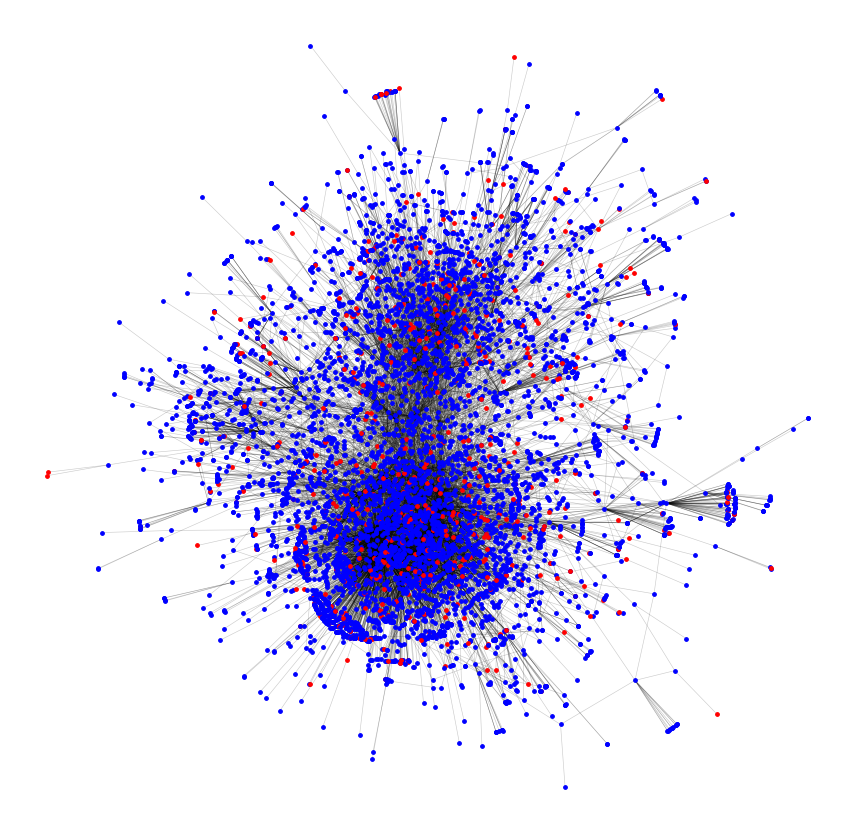

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [34]:
print_graph(G, pos_spring_layout, comportamiento2)

In [78]:
comportamiento2 = cambiarComportamiento(1000, comportamiento2)
cantidadXcomportamiento(comportamiento2)

Cantidad de A: 991
Cantidad de B: 5483


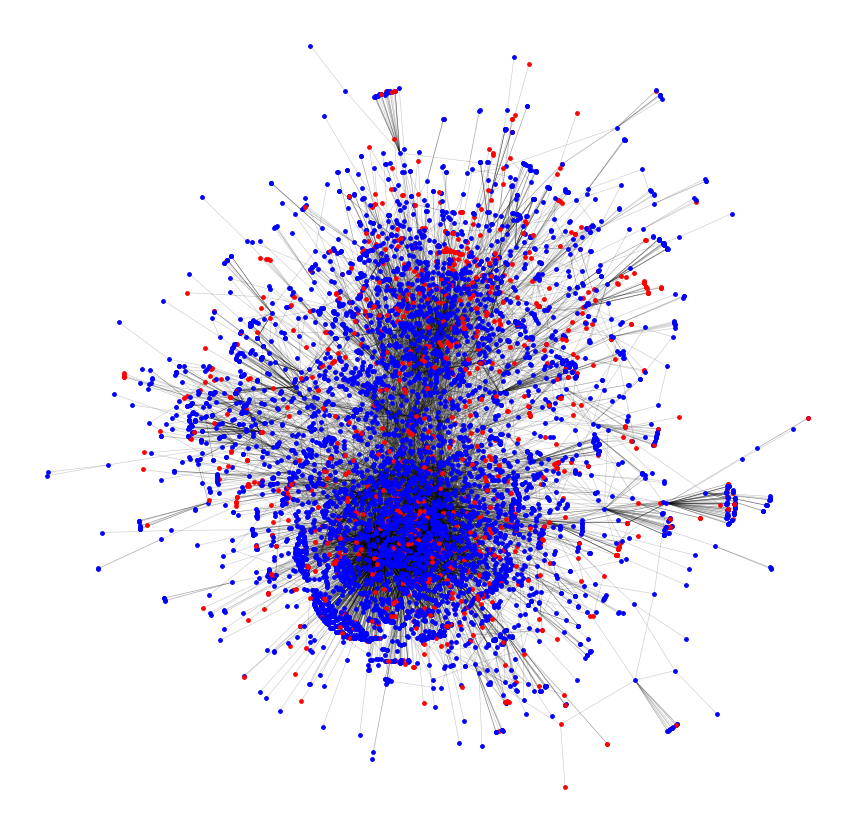

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [79]:
print_graph(G, pos_spring_layout, comportamiento2)

¿Quién comienza cascadas exitosas?
Probamos con los vertices mas centrales -> los que tienen mayor K-core-score


In [83]:
G_whitout_loops = G.copy()
G_whitout_loops.remove_edges_from(nx.selfloop_edges(G_whitout_loops))
k_core_score = nx.core_number(G_whitout_loops)

In [87]:
from operator import itemgetter
max_k_core_score = max(k_core_score.items(), key=itemgetter(1))
max_k_core_score

('0', 12)

In [97]:
comportamiento3 = {}
for node in G.nodes:
    if k_core_score[node] == 12:
        comportamiento3[node] = 'A'
    else:
        comportamiento3[node] = 'B'
cantidadXcomportamiento(comportamiento3)

Cantidad de A: 21
Cantidad de B: 6453


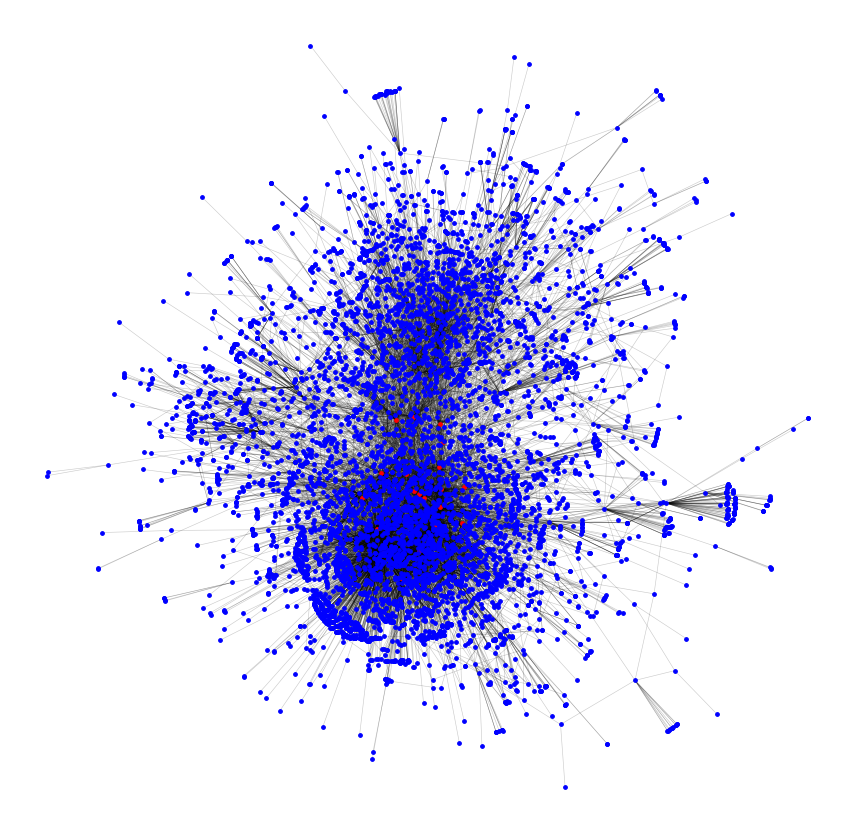

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [89]:
print_graph(G, pos_spring_layout, comportamiento3)

In [98]:
comportamiento3 = cambiarComportamiento(1000, comportamiento3)
cantidadXcomportamiento(comportamiento3)

Cantidad de A: 3224
Cantidad de B: 3250


In [91]:
print_graph(G, pos_spring_layout, comportamiento3)

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

Relajamos el k core score de los early adopters

In [111]:
comportamiento4 = {}
for node in G.nodes:
    if k_core_score[node] >= 5:
        comportamiento4[node] = 'A'
    else:
        comportamiento4[node] = 'B'
cantidadXcomportamiento(comportamiento4)

Cantidad de A: 240
Cantidad de B: 6234


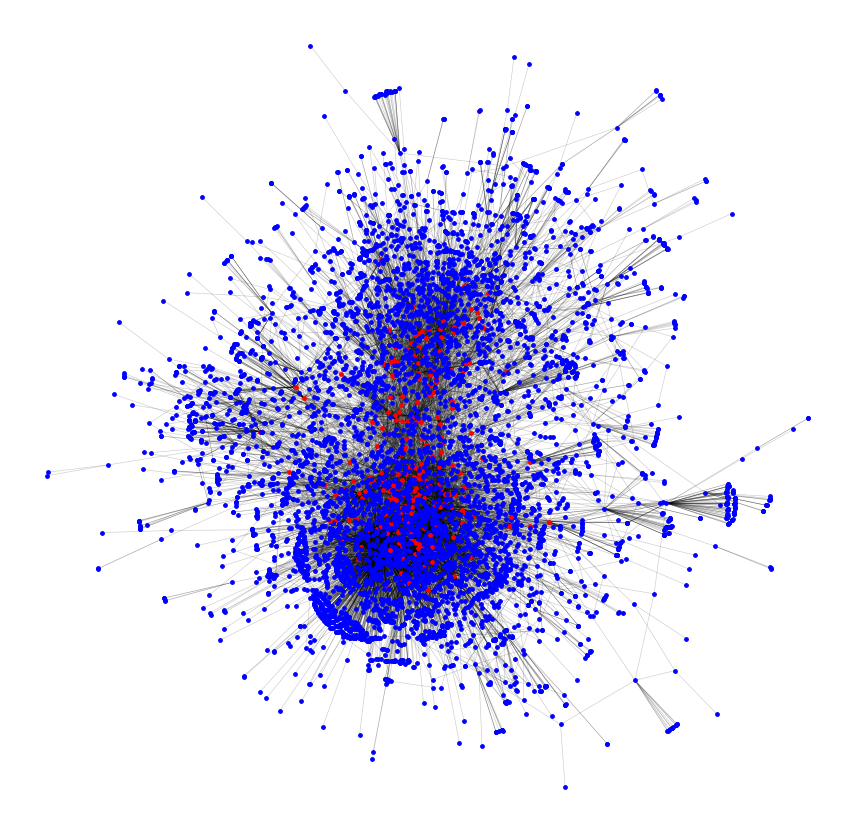

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [112]:
print_graph(G, pos_spring_layout, comportamiento4)

In [113]:
comportamiento4 = cambiarComportamiento(1000, comportamiento4)
cantidadXcomportamiento(comportamiento4)

Cantidad de A: 4724
Cantidad de B: 1750


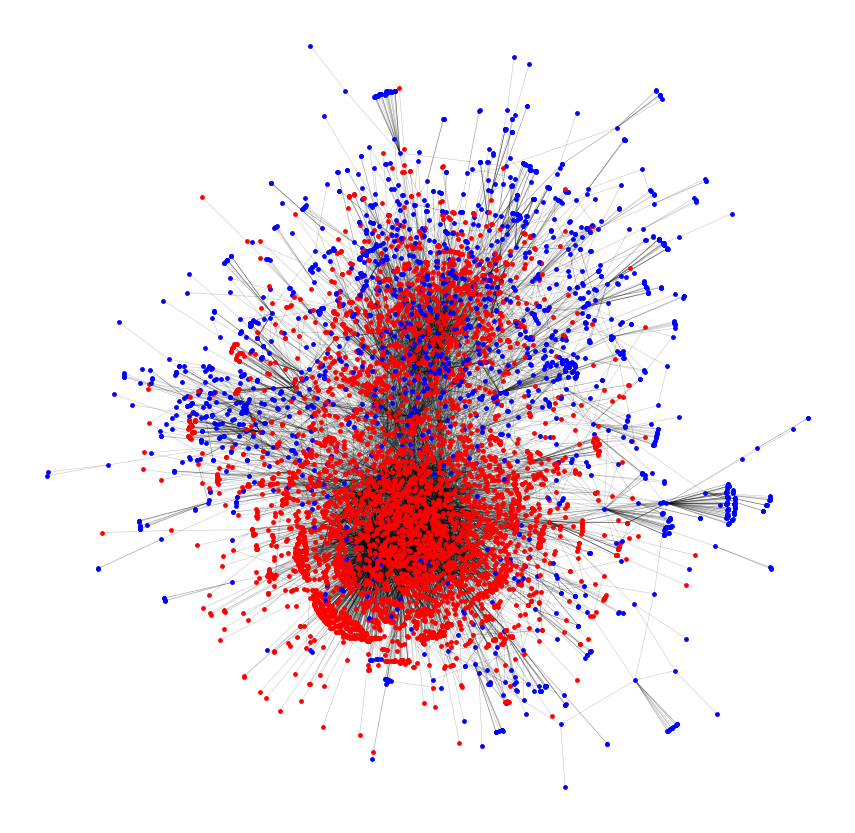

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [114]:
print_graph(G, pos_spring_layout, comportamiento4)

Buscamos un k-core-score aun mas bajo con la intencion que toda la red se convierta al nuevo comportamiento

In [132]:
comportamiento5 = {}
for node in G.nodes:
    if k_core_score[node] >= 2:
        comportamiento5[node] = 'A'
    else:
        comportamiento5[node] = 'B'
cantidadXcomportamiento(comportamiento5)

Cantidad de A: 4023
Cantidad de B: 2451


In [133]:
comportamiento5 = cambiarComportamiento(1000, comportamiento5)
cantidadXcomportamiento(comportamiento5)

Cantidad de A: 6418
Cantidad de B: 56


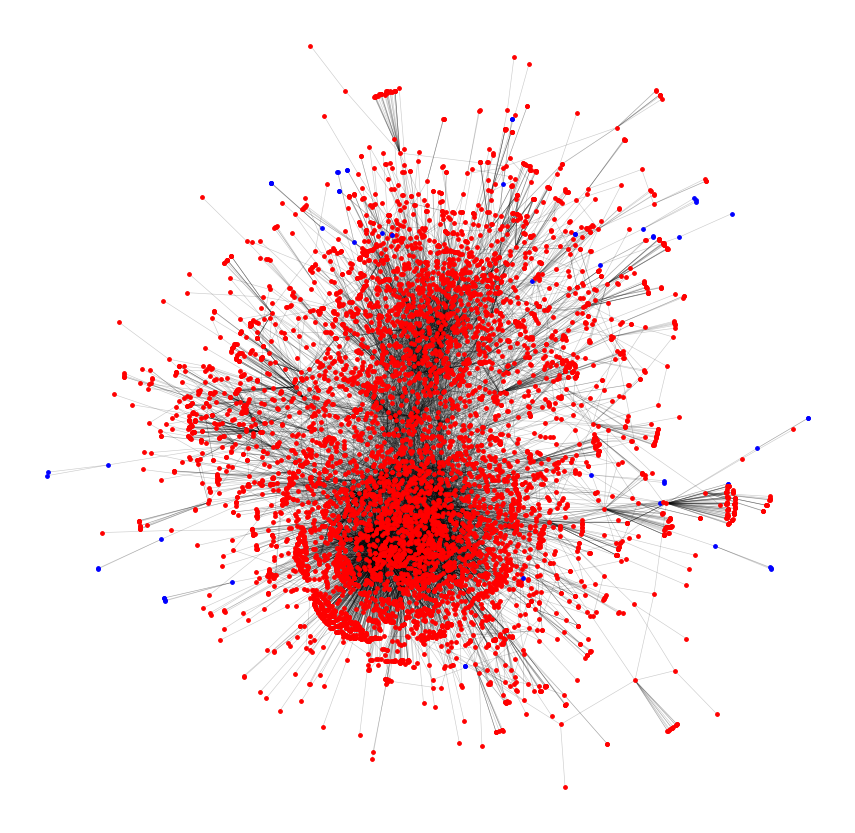

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [144]:
print_graph(G, pos_spring_layout, comportamiento5)

In [135]:
comportamiento6 = {}
for node in G.nodes:
    if k_core_score[node] >= 1:
        comportamiento6[node] = 'A'
    else:
        comportamiento6[node] = 'B'
cantidadXcomportamiento(comportamiento6)

Cantidad de A: 6474
Cantidad de B: 0


No hay forma de hacer que todos cambien de comportamiento usando k core score

Buscamos una forma random de que todos se cambien de comportamiento usando una prob de early adopter muy alta (claramente no es aplicable a la vida real)

In [150]:
comportamiento7 = generarComportamientoRandom(0.7)
cantidadXcomportamiento(comportamiento7)

Cantidad de A: 4523
Cantidad de B: 1951


In [151]:
comportamiento7 = cambiarComportamiento(1000,comportamiento7)
cantidadXcomportamiento(comportamiento7)

Cantidad de A: 6474
Cantidad de B: 0


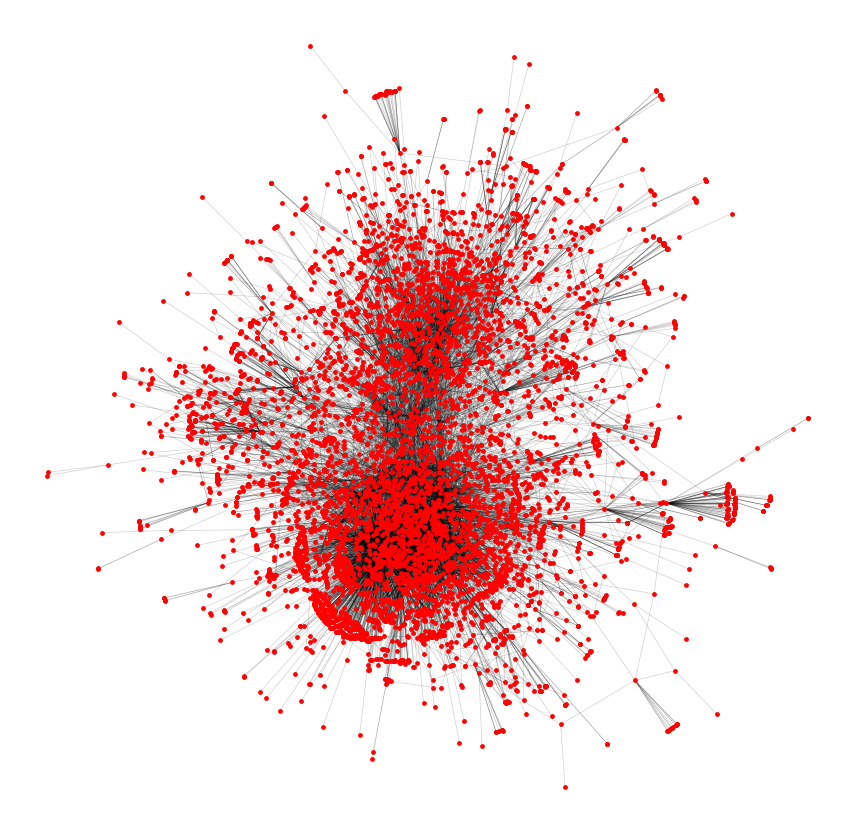

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [152]:
print_graph(G, pos_spring_layout, comportamiento7)